# Исследование данных о пользователях приложения Procrastinate Pro+

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

Для этого выполнить шаги:

### Загрузить данные и подготовить их к анализу
 
### Задать функции для расчета и анализа LTV, ROI, удержания и конверсии

### Провести исследовательский анализ данных

### Маркетинговый анализ

### Оценить окупаемость рекламы для привлечения пользователей

### Сделать общие выводы


**Описание данных**

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
#импорт библиотек

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#загрузка таблиц, сохранение в переменные

visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

for i in visits, orders, costs:
    display(i.head(5))

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [3]:
#приведение данных к нижнему регистру

for i in visits, orders, costs:
    i.columns = i.columns.str.lower()
    display(i.columns)

Index(['user id', 'region', 'device', 'channel', 'session start',
       'session end'],
      dtype='object')

Index(['user id', 'event dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

In [4]:
#переименуем колонки

visits = visits.rename(columns={'user id':'user_id','session start':'session_start','session end':'session_end'})

orders = orders.rename(columns={'user id':'user_id','event dt':'event_dt'})

In [5]:
#проверка типа данных в столбцах

for i in visits, orders, costs:
    display(i.dtypes)

user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object

user_id       int64
event_dt     object
revenue     float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object

In [6]:
#проверка на пропуски

for i in visits, orders, costs:
    display(i.isna().mean())

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

dt         0.0
channel    0.0
costs      0.0
dtype: float64

In [7]:
#проверка на дубликаты

for i in visits, orders, costs:
    display(i.duplicated().sum())

0

0

0

In [8]:
# преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Данные подготовлены к анализу. Названия столбцов приведены к нижнему регистру и переименованы для удобства. Данные в столбцах с датами приведены к нужному типу. Пропуски и дубликаты не обнаружены.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

       # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [10]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [14]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 12))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [17]:
#построение пользовательских профилей

profiles = get_profiles(visits, orders, costs)

profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [18]:
# минимальная дата привлечения

min_date = min(profiles['dt'])

min_date

datetime.date(2019, 5, 1)

In [19]:
# максмальная дата привлечения

max_date = max(profiles['dt'])

max_date

datetime.date(2019, 10, 27)

In [20]:
#число уникальных пользователей, доля платящих пользователей по регионам

(profiles
 .groupby('region')
 .agg({'payer':['count','mean']})
 .sort_values([('payer','mean')],ascending=False)
 .reset_index()
 .rename(columns={'payer': 'n_users payer_share'})
)

region n_users payer_share          
                               count      mean
0  United States              100002  0.069019
1        Germany               14981  0.041119
2             UK               17575  0.039829
3         France               17450  0.037994

Лучше всего в платящих конвертируются пользователи из США, там же большая доля уникальных посетителей

In [21]:
#число уникальных пользователей, доля платящих пользователей по устройствам

(profiles
 .groupby('device')
 .agg({'payer':['count','mean']})
 .sort_values([('payer','mean')],ascending=False)
 .reset_index()
 .rename(columns={'payer': 'n_users payer_share'})
)

device n_users payer_share          
                         count      mean
0      Mac               30042  0.063644
1   iPhone               54479  0.062079
2  Android               35032  0.058518
3       PC               30455  0.050468

Примерно равная доля платящих у iPhone и Mac, большее число уникальных пользователей у iPhone, у остальных устройств примерно одинаковое

In [22]:
#число уникальных пользователей, доля платящих пользователей по каналам привлечения

(profiles
 .groupby('channel')
 .agg({'payer':['count','mean']})
 .sort_values([('payer','mean')],ascending=False)
 .reset_index()
 .rename(columns={'payer': 'n_users payer_share'})
 
)

channel n_users payer_share          
                                     count      mean
0             FaceBoom               29144  0.122049
1           AdNonSense                3880  0.113402
2       lambdaMediaAds                2149  0.104700
3               TipTop               19561  0.096007
4       RocketSuperAds                4448  0.079137
5       WahooNetBanner                8553  0.052964
6              YRabbit                4312  0.038265
7         MediaTornado                4364  0.035747
8              LeapBob                8553  0.030633
9   OppleCreativeMedia                8605  0.027077
10             organic               56439  0.020553

Большая доля платящих пришла через FaceBoom, AdNonSense, lambdaMediaAds. У organic-пользователей самое большое число уникальных посетителей

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [23]:
#потрачено всего

profiles['acquisition_cost'].sum().round(2)

105497.29999999999

In [24]:
#всего уникальных пользователей

profiles['user_id'].count()

150008

In [25]:
#потрачено на привлечение по регионам

profiles.groupby('region').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost',ascending=False).reset_index()

region  acquisition_cost
0  United States      90928.600000
1         France       5075.973946
2             UK       5068.502819
3        Germany       4424.223235

Виден явный перекос по тратам на привлечение в США. В этом может быть проблема.

In [26]:
#потрачено на привлечение по каналам

channel_costs = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost',ascending=False).reset_index()

channel_costs['%total'] = round(channel_costs['acquisition_cost'] / profiles['acquisition_cost'].sum() * 100,2)

channel_costs

channel  acquisition_cost  %total
0               TipTop          54751.30   51.90
1             FaceBoom          32445.60   30.75
2       WahooNetBanner           5151.00    4.88
3           AdNonSense           3911.25    3.71
4   OppleCreativeMedia           2151.25    2.04
5       RocketSuperAds           1833.00    1.74
6              LeapBob           1797.60    1.70
7       lambdaMediaAds           1557.60    1.48
8         MediaTornado            954.48    0.90
9              YRabbit            944.22    0.90
10             organic              0.00    0.00

Основной рекламный бюджет пришёлся по сути на два канала TipTop, FaceBoom. В этом также может быть проблема

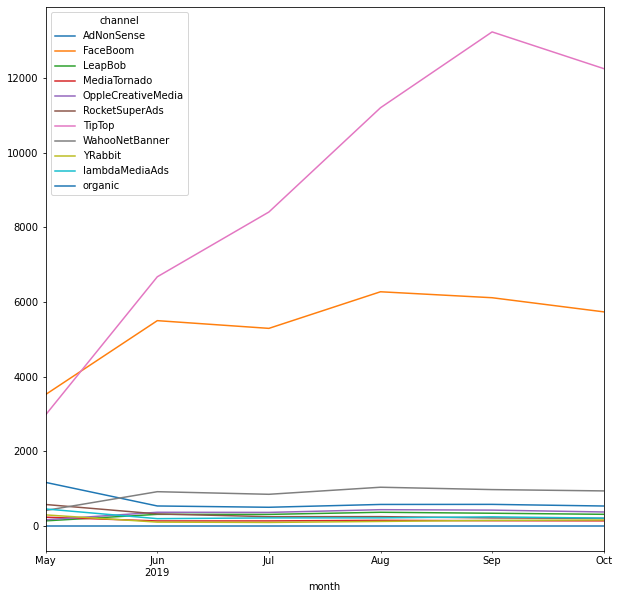

In [27]:
#потрачено на привлечение по месяцам с разбивкой по каналам

profiles.pivot_table(index = 'month', columns = 'channel', values = 'acquisition_cost', 
                      aggfunc = 'sum').plot(figsize=(10,10));

Повторяется прошлый вывод, что задействованы были по сути только два канала

In [28]:
#средняя цена привлечения одного пользователя по каналам

profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost',ascending=False).reset_index()

channel  acquisition_cost
0               TipTop          2.799003
1             FaceBoom          1.113286
2           AdNonSense          1.008054
3       lambdaMediaAds          0.724802
4       WahooNetBanner          0.602245
5       RocketSuperAds          0.412095
6   OppleCreativeMedia          0.250000
7              YRabbit          0.218975
8         MediaTornado          0.218717
9              LeapBob          0.210172
10             organic          0.000000

Самые "дорогие" пользователи пришли через TipTop. Далее следуют FaceBoom и AdNonSense с почти равной ценой.

In [29]:
#средний CAC на одного пользователя

profiles.query('channel !="organic"')['acquisition_cost'].mean()

1.1274813239427588

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

In [30]:
#задаем дату анализа и горизонт

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

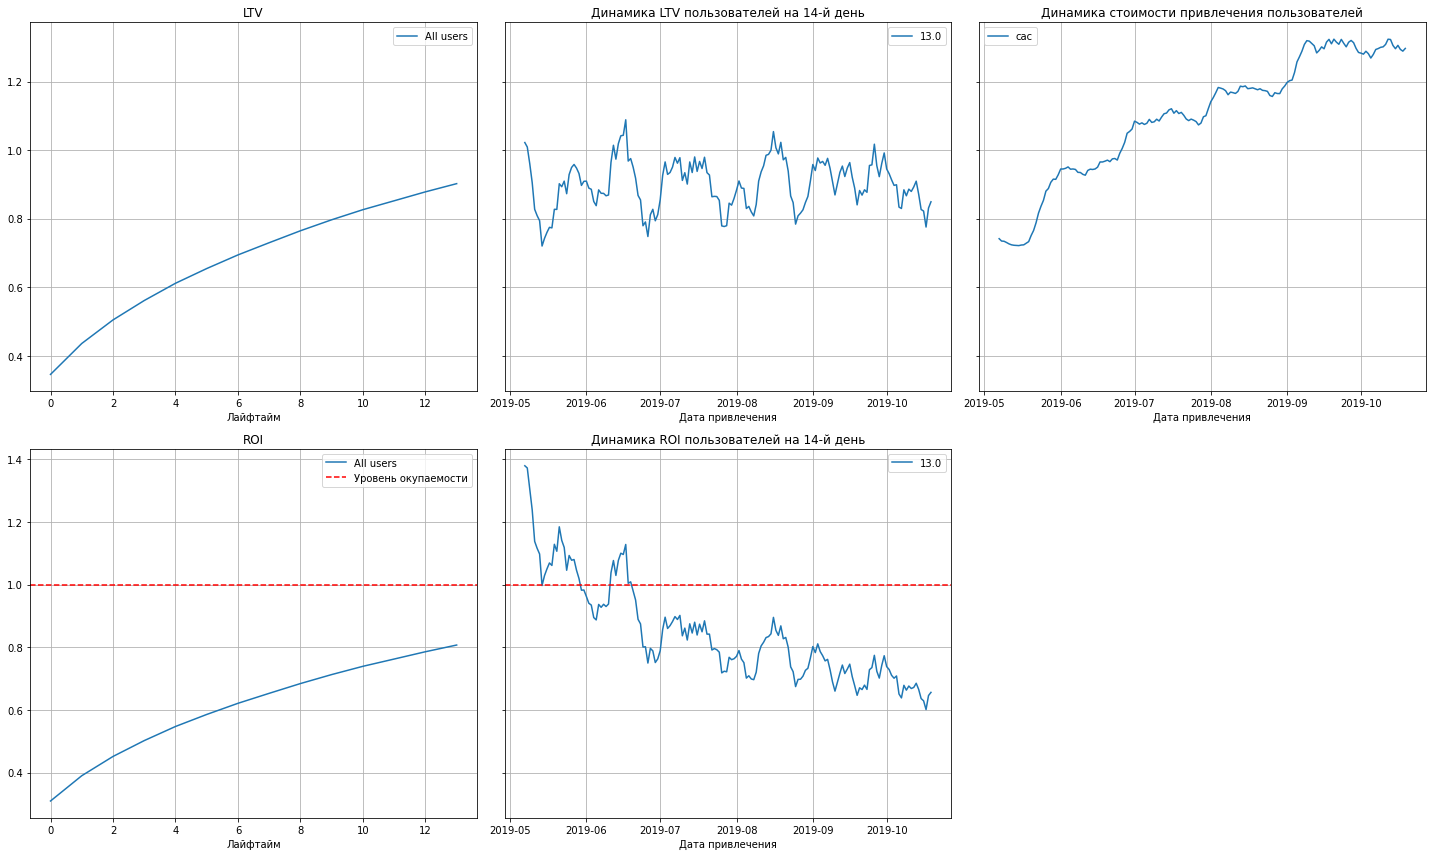

In [31]:
# считаем LTV и ROI без учета organic пользователей

profiles = profiles.query('channel != "organic"')


ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Видно, что, несмотря на значительный рост CAC с июня, реклама не окупилась: к 14ому дню ROI едва достигает 0.8, динамика по месяцам также отрицательная. LTV имеет некоторую сезонность, но в целом стабилен.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

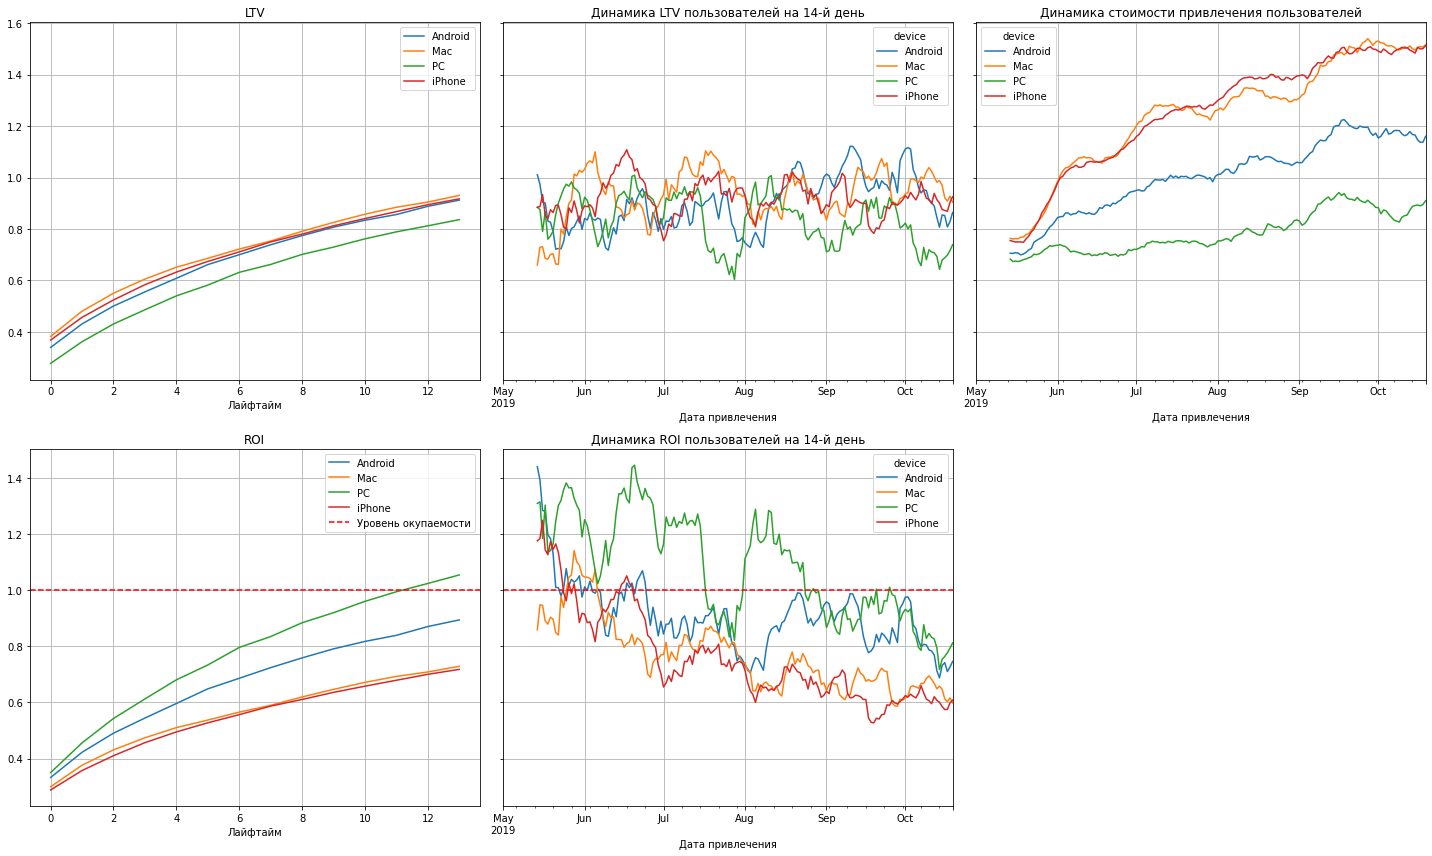

In [32]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Стоимость привлечения пользователей iPhone и Mac примерно равна, выше пользователей остальных платформ и продолжает расти. Несмотря на это, их привлечение не окупается. Окупается только привлечение пользователей PC.

### Проанализируйте окупаемость рекламы с разбивкой по странам

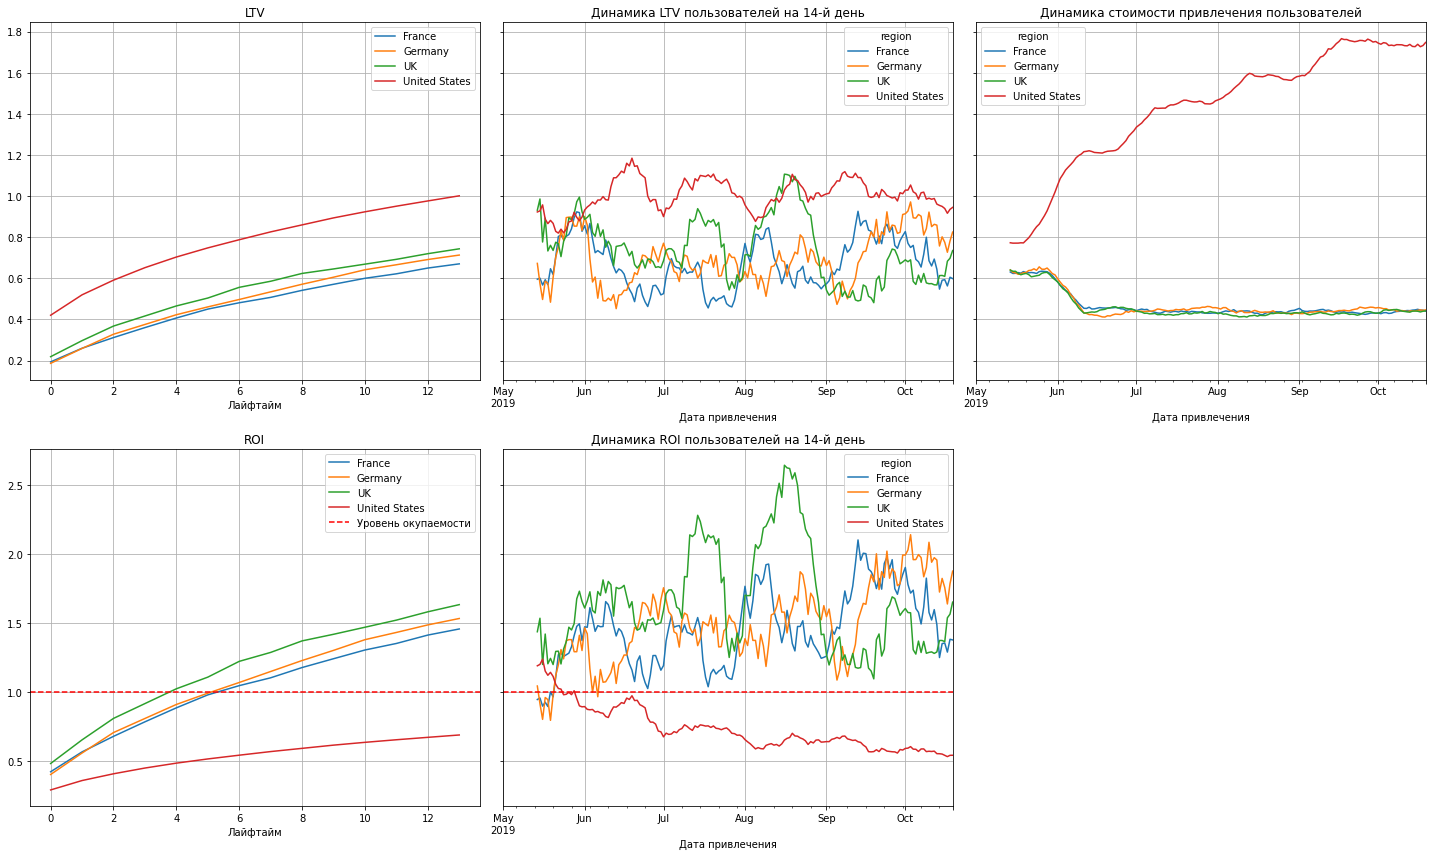

In [33]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Значительный бюджет был потрачен на привлечение пользователей из США и затраты в итоге не окупились, динамика ROI отрицательная.  Проблема, в том числе, скорее всего в этом. В остальных регионах бюджет с июня уменьшился.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

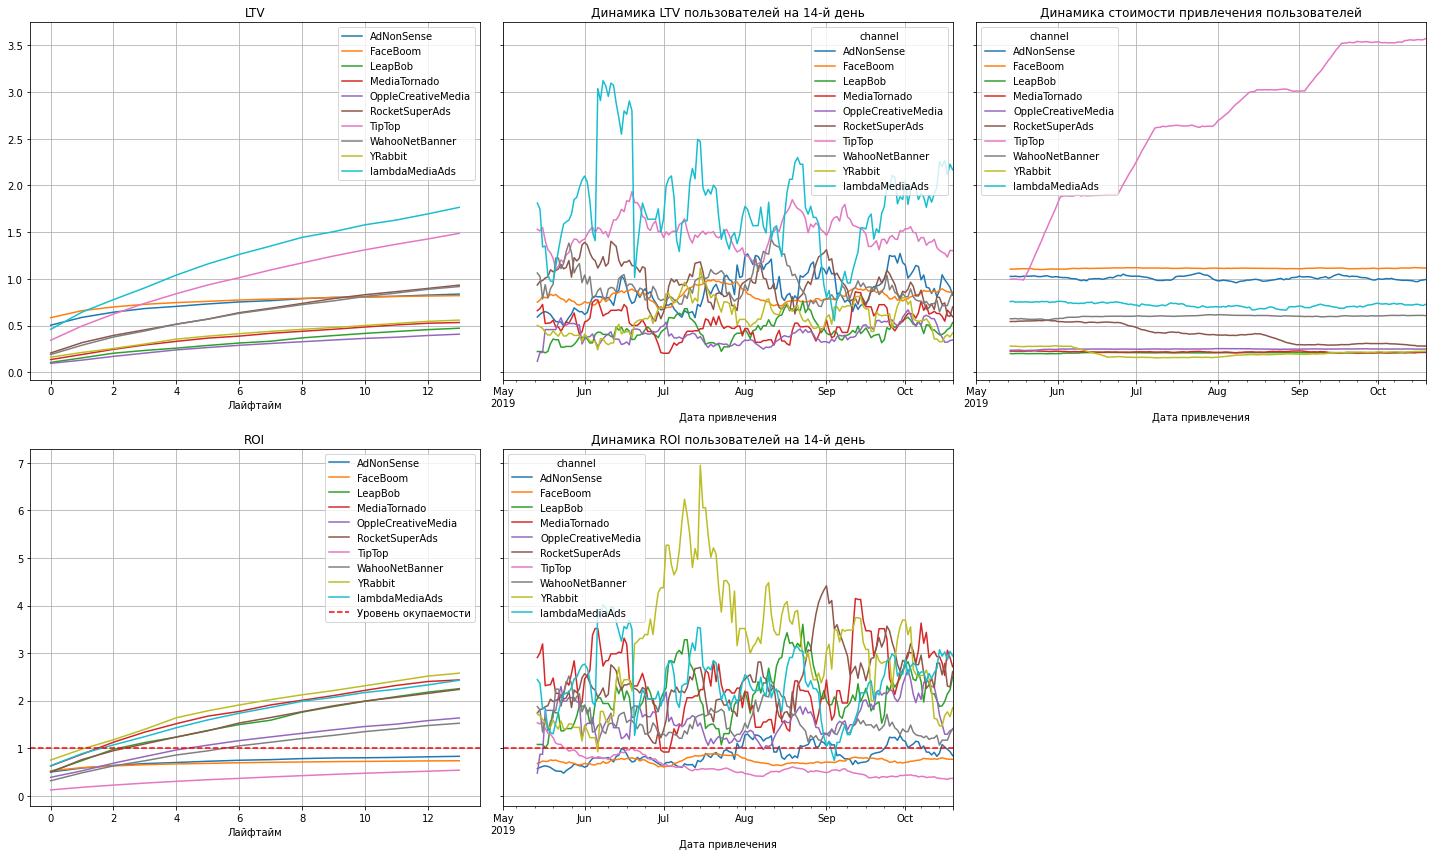

In [34]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Значительные средства потратили на привлечение через канал TipTop и FaceBoom, причем на TipTop тратили с каждым месяцем всё больше. Затраты при этом не окупились, также как и на привлечение через и AdNonSense.

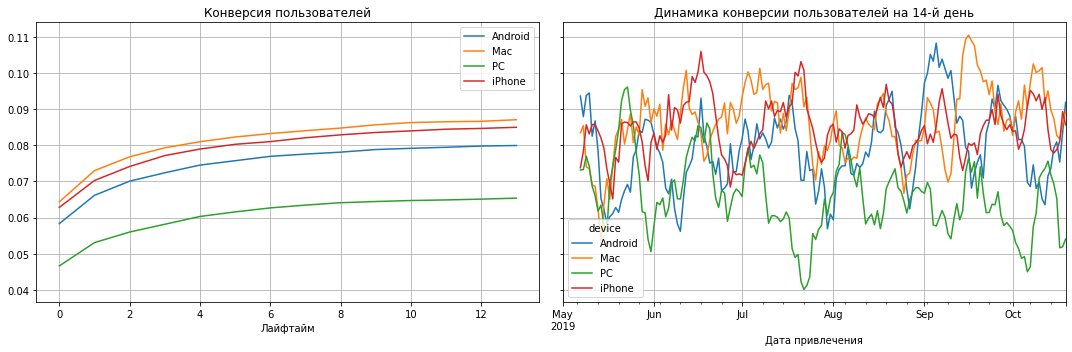

In [35]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей PC самая низкая, у остальных платформ примерно одинаковая. Динамика выглядит естественно.

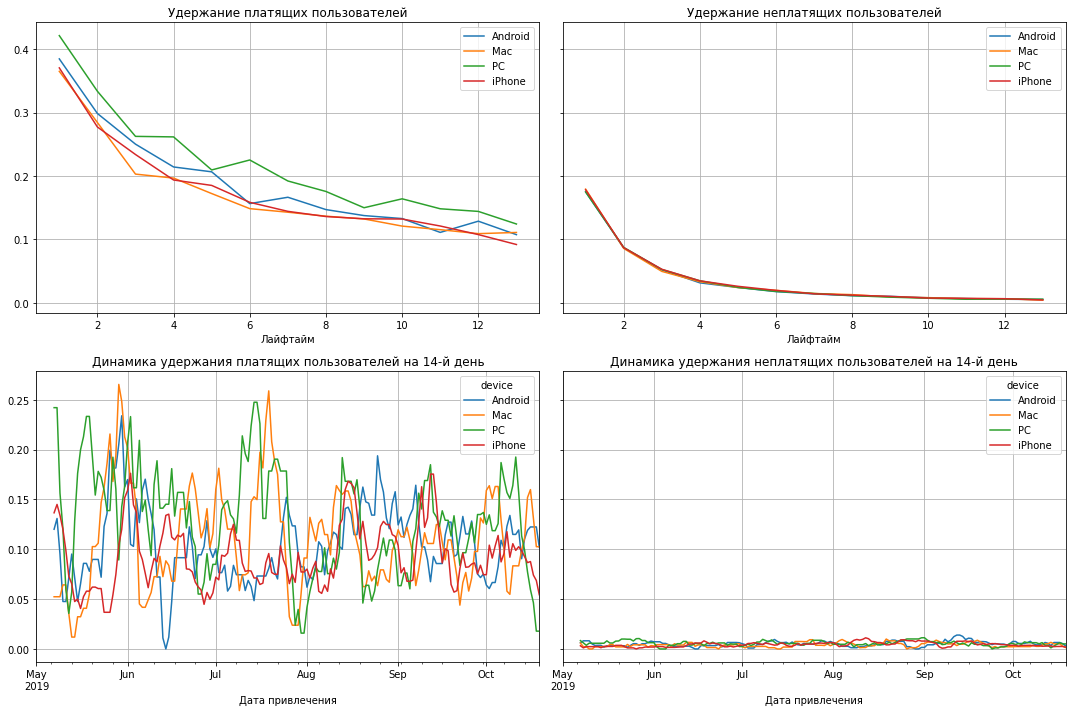

In [36]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

При этом удержание на PC самое высокое, у остальных платформ примерно одинаковое.

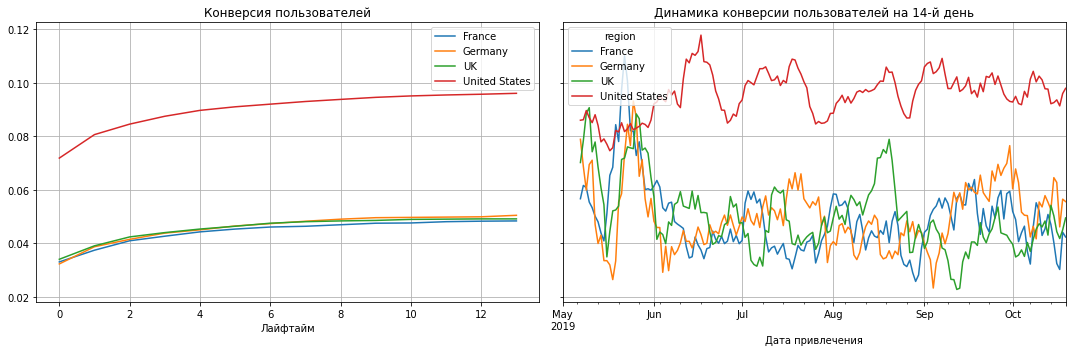

In [37]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Выделяется конверсия в США относительно других регионов. Высокие траты на рекламу, видимо, повысили конверсию, но это всё равно не окупилось.

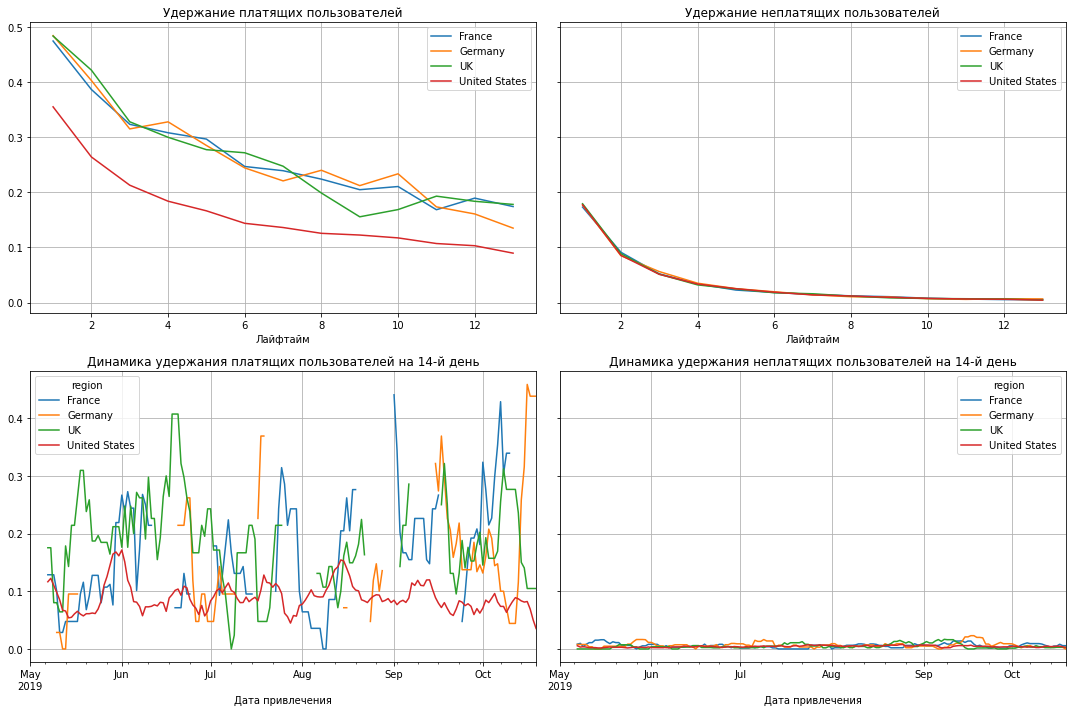

In [38]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание в США при этом самое низкое. Хотя пришло много новых пользователей, далеко не все из них остались. Можно предположить, что был достигнут некий предел привлечения, выше которого траты на рекламу не окупаются. Также видны прерывистые линии в динамике удержания платящих пользователей, кроме линии США. Похоже, что для этих стран данные и\или трафик частично отсутствуют.

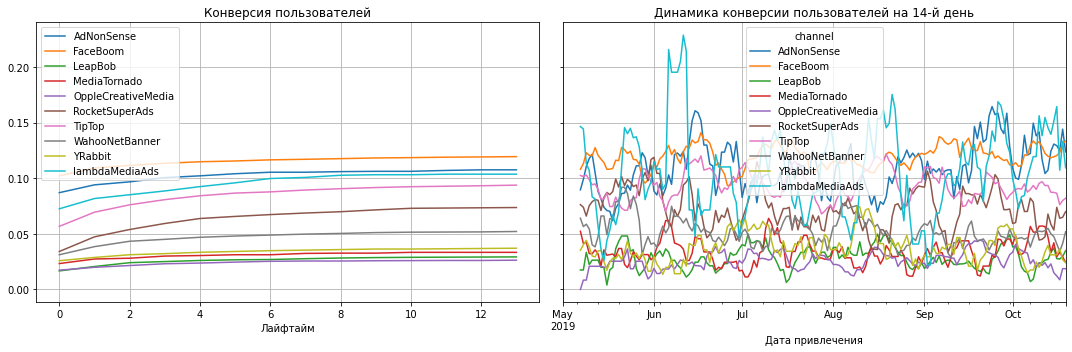

In [39]:
# смотрим конверсию с разбивкой по каналам привлечения

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Видна высокая конверсия для каналов TipTop, FaceBoom, на которые потратили большую часть бюджета. При этом конверсия сравнима с теми каналами, на которые тратилось значительно меньше - AdNonSense, lambdaMediaAds и т.д. Скорее всего имело смысл перераспределить бюджет и закупить трафик также в этих каналах. Самая низкая конверсия у organic-пользователей.

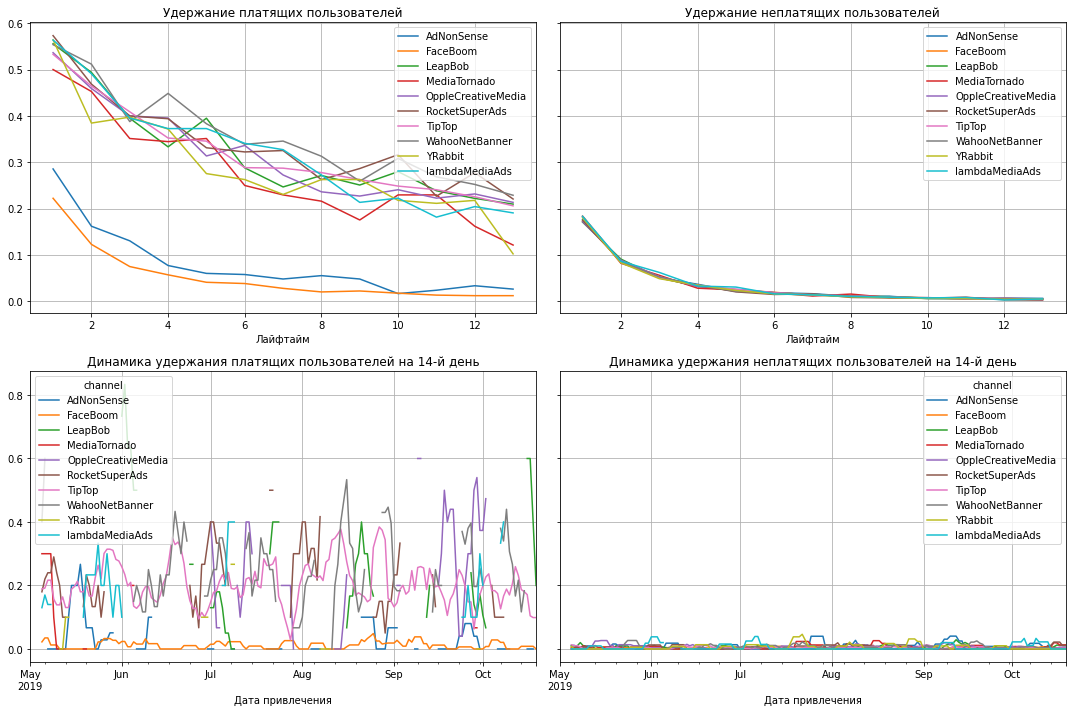

In [40]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=5) 

Видно, что несмотря на затраты, удержание пользователей, пришедших через FaceBoom, самое низкое, на одном уровне с AdNonSense-пользователями. Удержание остальных каналов примерно равное. 

Также снова видны разрывы линий графика динамики удержания, кроме источников TipTop и FaceBoom. Данные о трафике из этих источников опять отсутствуют. Скорее всего, трафик через эти источники закупался нерегулярно и траты были незначительные, исходя из п.4. Убедимся ещё раз:

In [41]:
profiles.groupby(['region','channel']).agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost',ascending=False).reset_index()

region             channel  acquisition_cost
0   United States              TipTop      54751.300000
1   United States            FaceBoom      32445.600000
2   United States      RocketSuperAds       1833.000000
3              UK      WahooNetBanner       1808.890277
4          France      WahooNetBanner       1789.137006
5         Germany      WahooNetBanner       1552.972718
6          France          AdNonSense       1376.316788
7              UK          AdNonSense       1305.650668
8         Germany          AdNonSense       1229.282545
9   United States        MediaTornado        954.480000
10  United States             YRabbit        944.220000
11             UK  OppleCreativeMedia        763.180209
12         France  OppleCreativeMedia        747.336327
13        Germany  OppleCreativeMedia        640.733464
14             UK             LeapBob        639.607864
15         France             LeapBob        628.045578
16             UK      lambdaMediaAds        551.173800
17         France      lambdaMediaAds        535.138248
18        Germany             LeapBob        529.946557
19        Germany      lambdaMediaAds        471.287952

Предположение подтвердилось: фокус делался на пользователях США, и использовались соответствующие каналы.

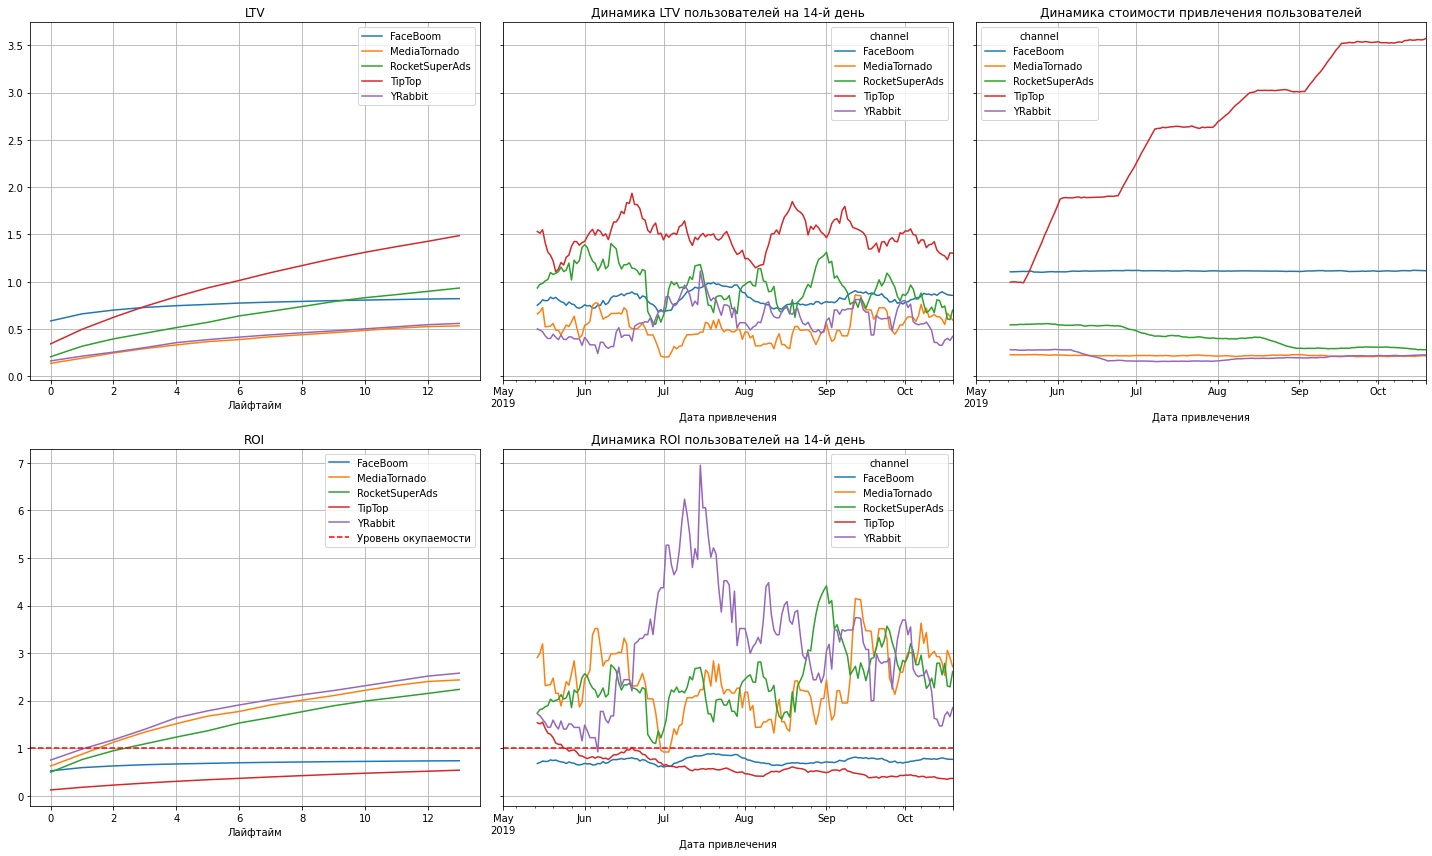

In [42]:
# рассмотрим рекламу отдельно в США

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

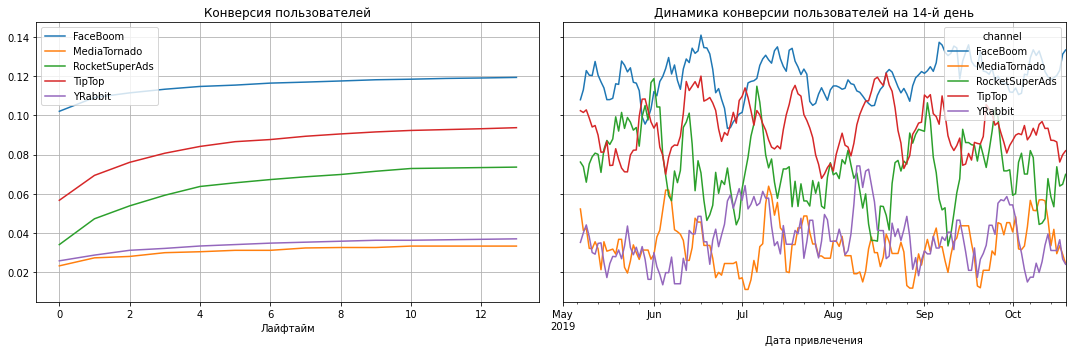

In [43]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

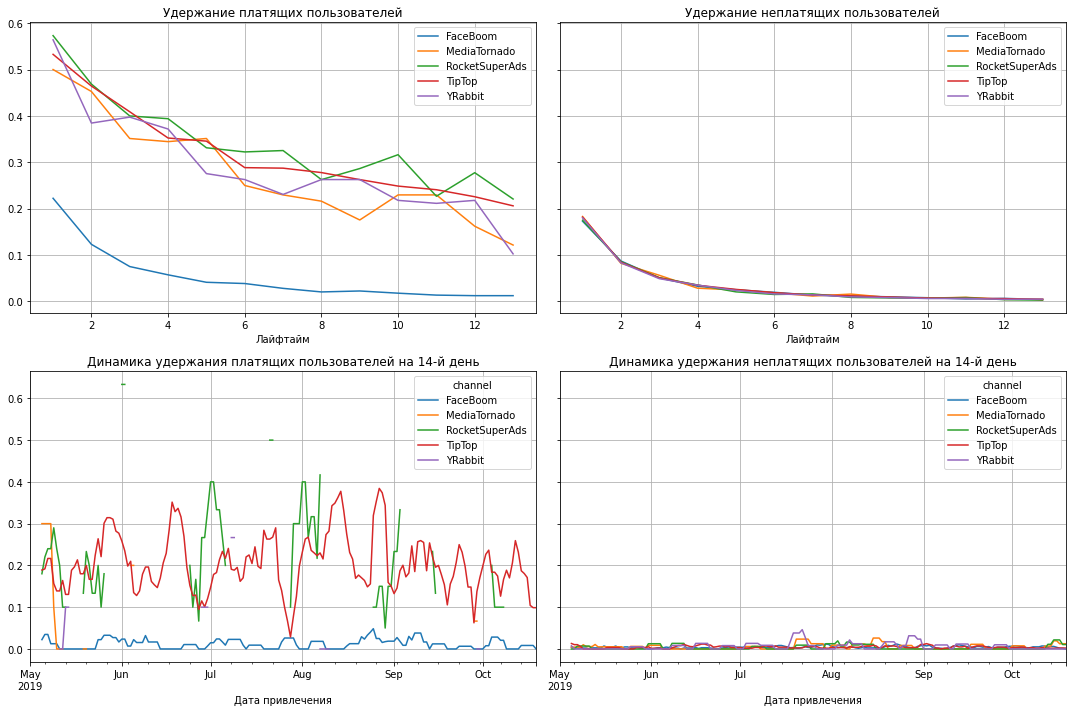

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region=="United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=5) 

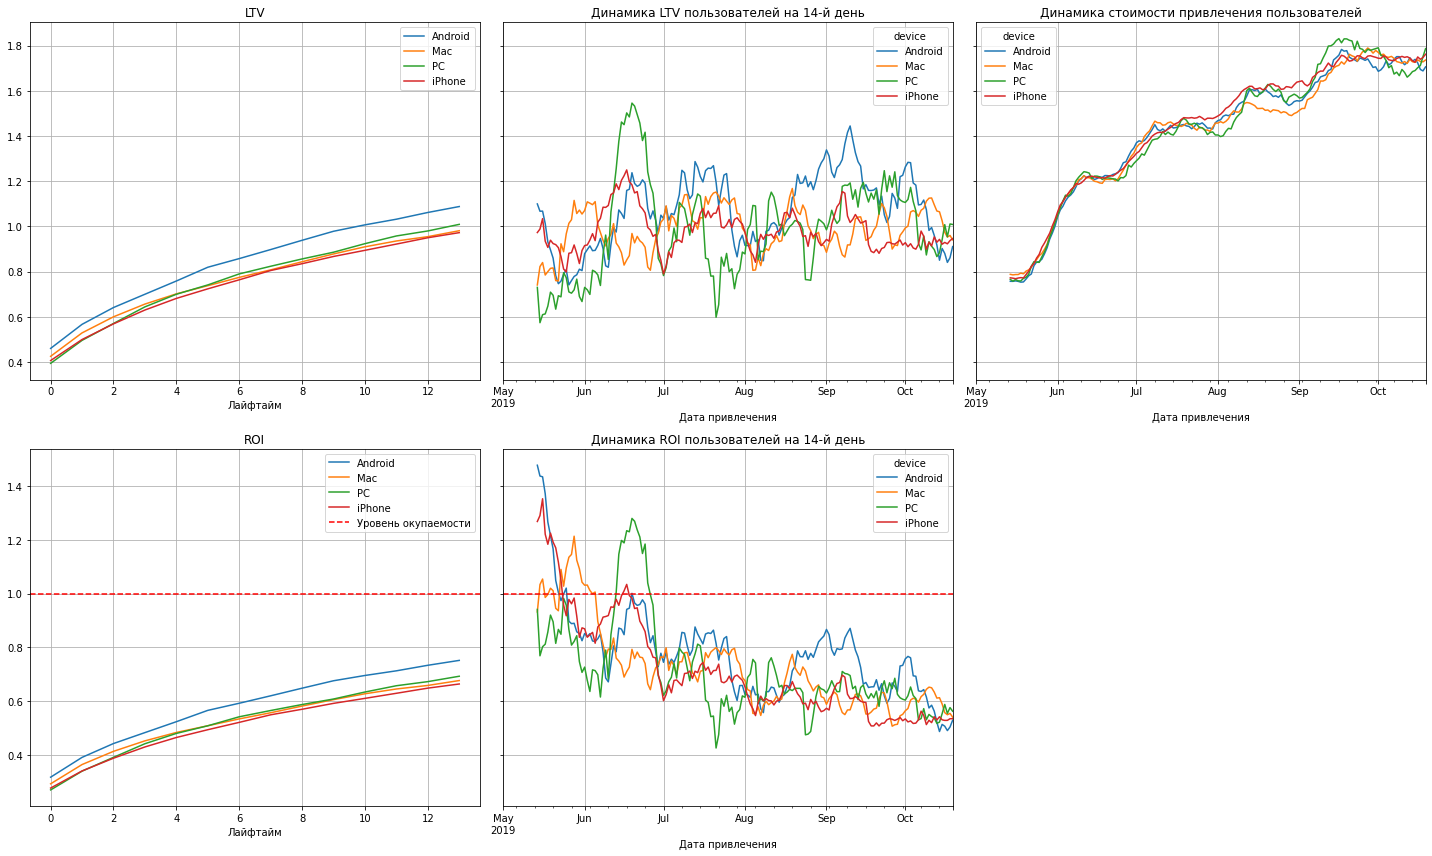

In [45]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

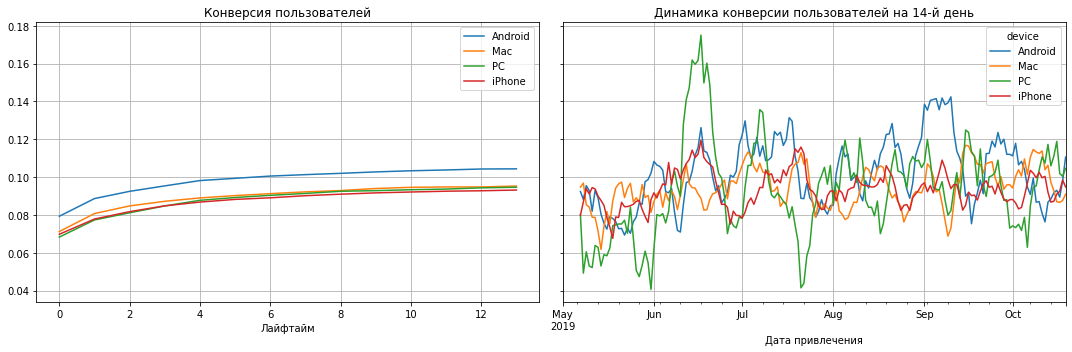

In [46]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region=="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

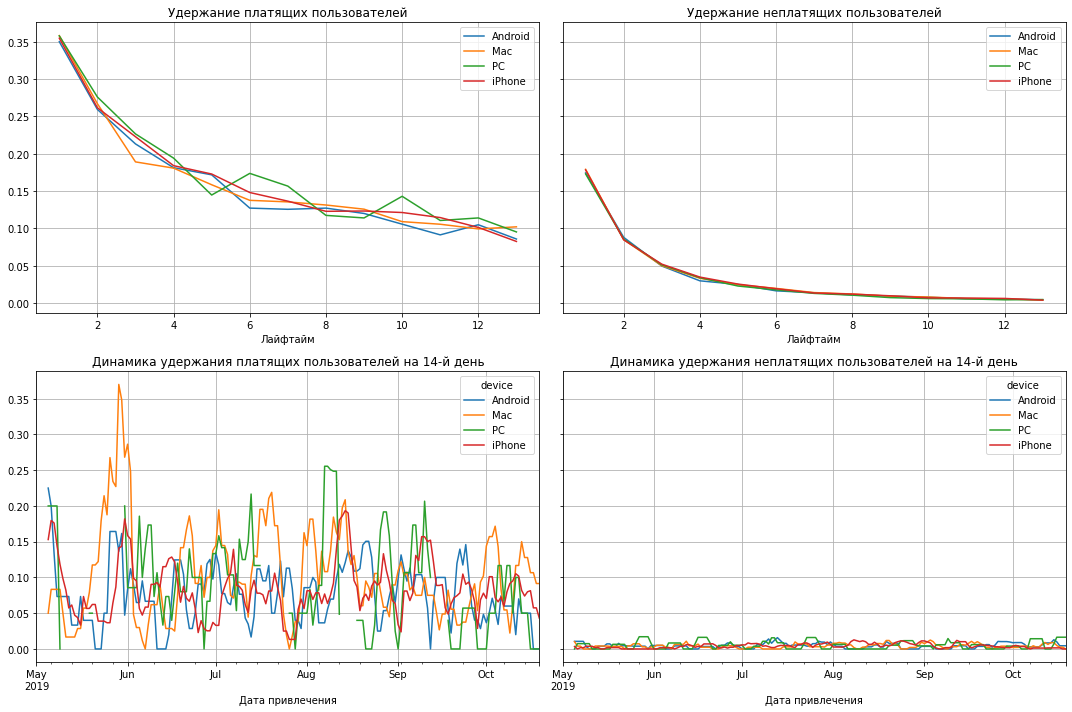

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region=="United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=5) 

Рассматривая отдельно США, можно дать рекомендации насчёт будущей рекламной кампании в этом регионе. Перспективно использовать альтернативные каналы привлечения: YRabbit, MediaTornado, RocketSuperAds. Расмотреть также рекламу с большим упором на Android.

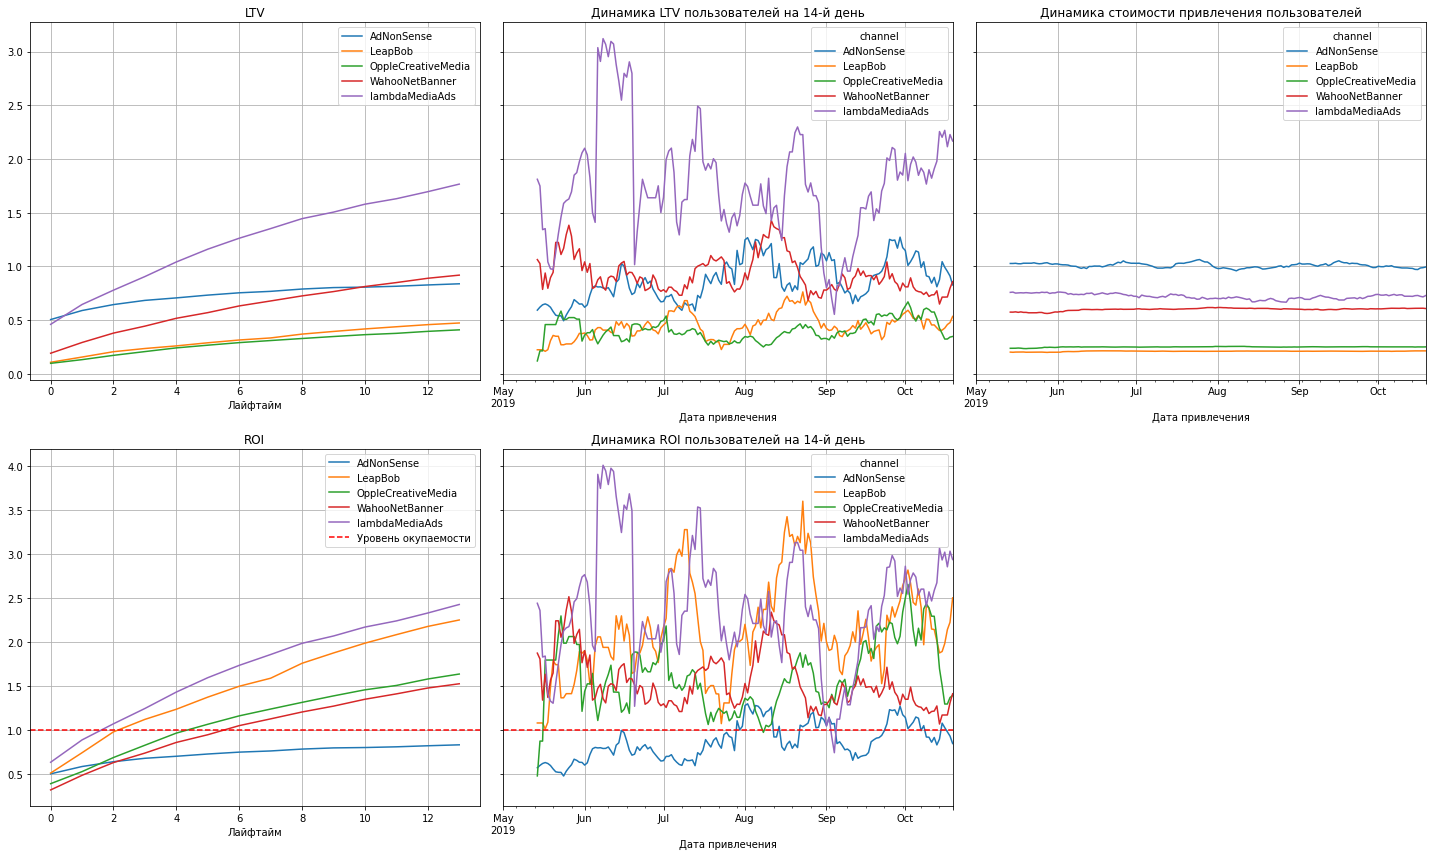

In [48]:
# рассмотрим рекламу отдельно в Европе

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region !="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

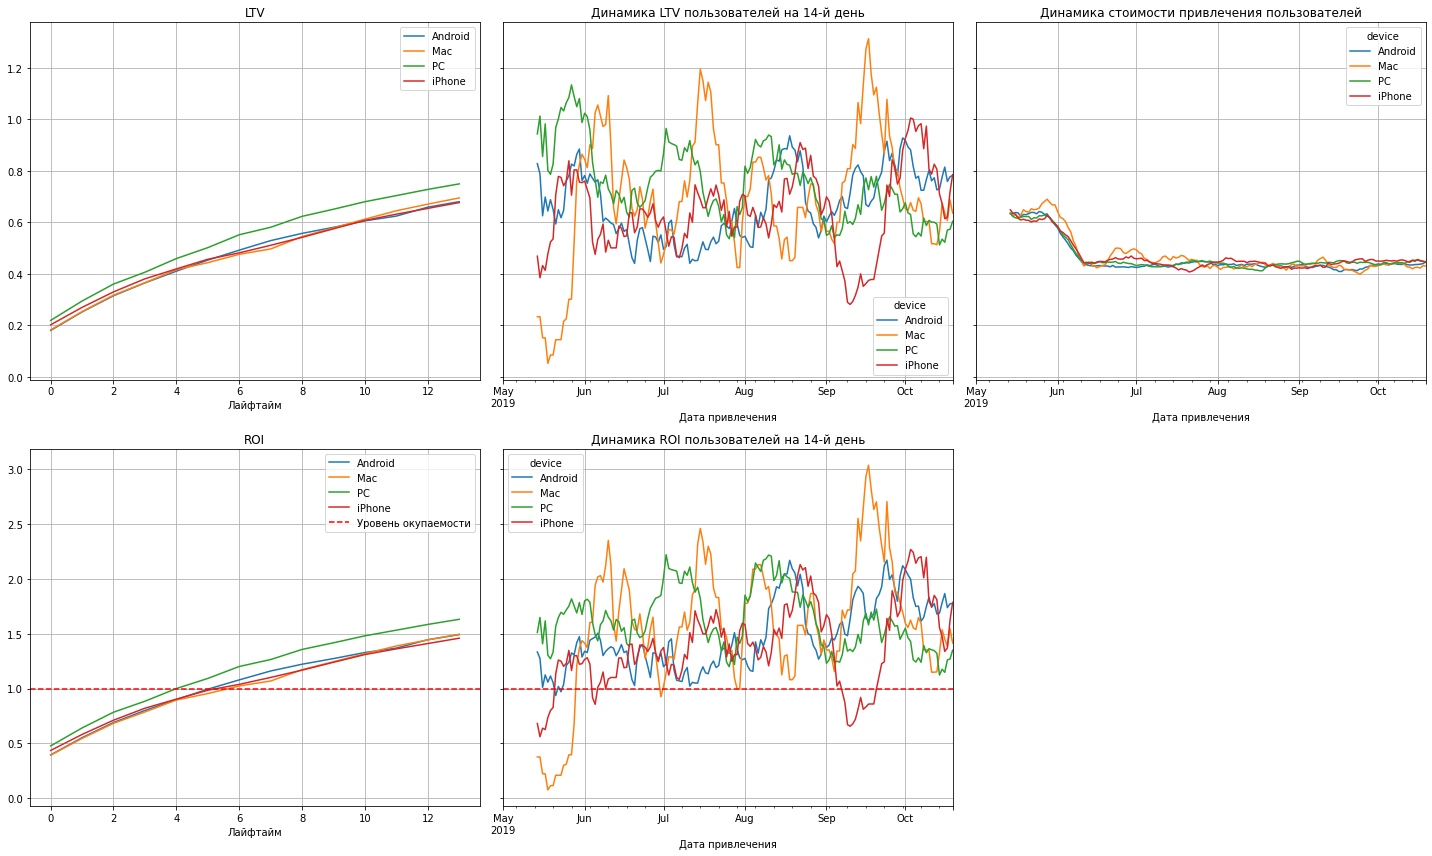

In [49]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region !="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

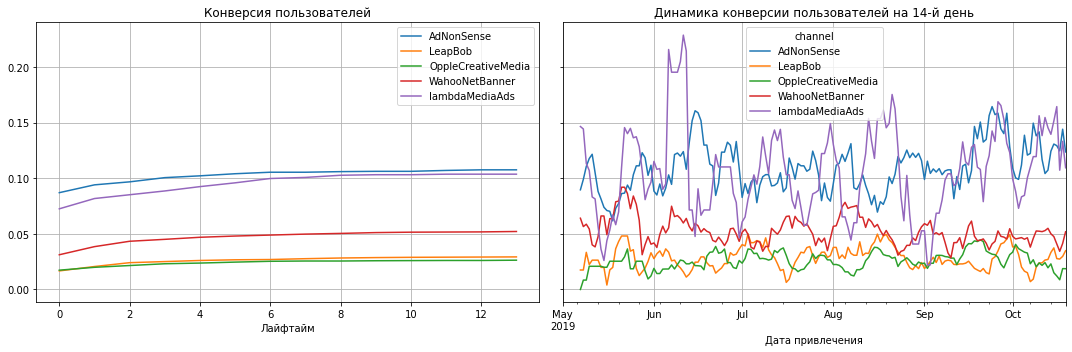

In [50]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region !="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

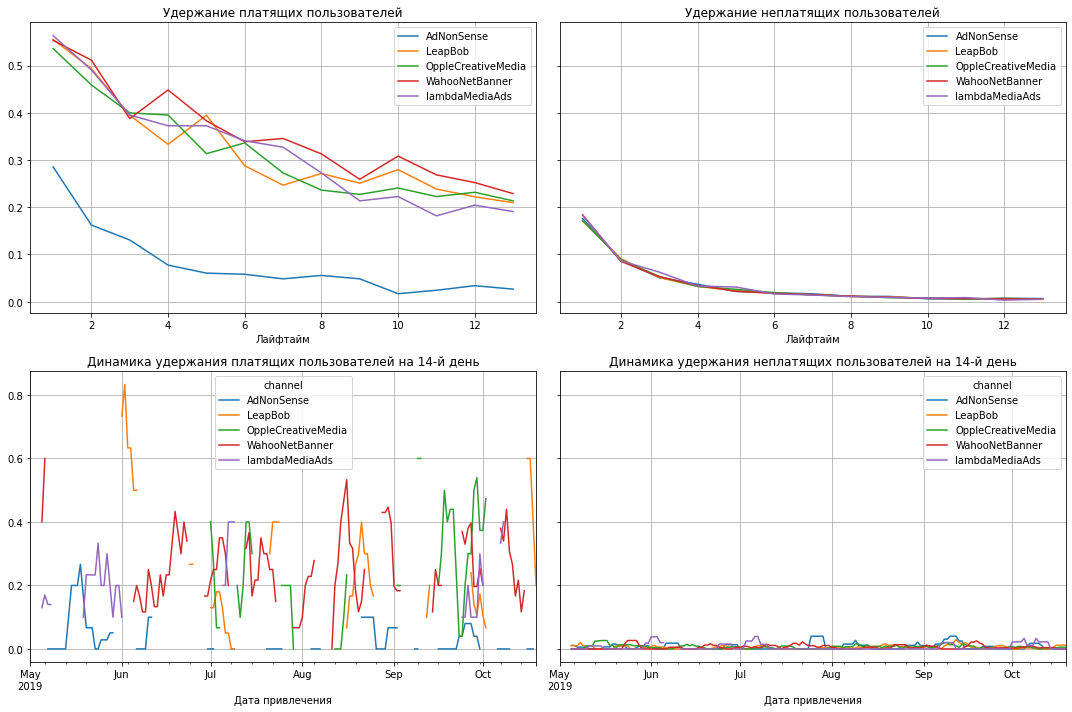

In [51]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region !="United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=5) 

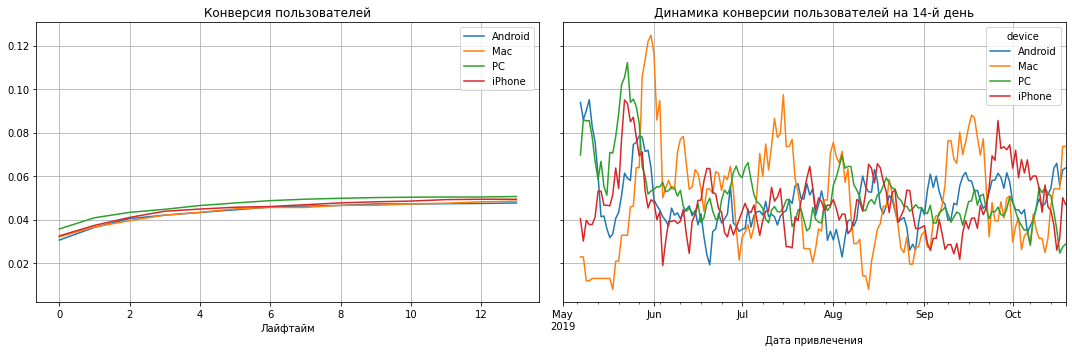

In [52]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region !="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

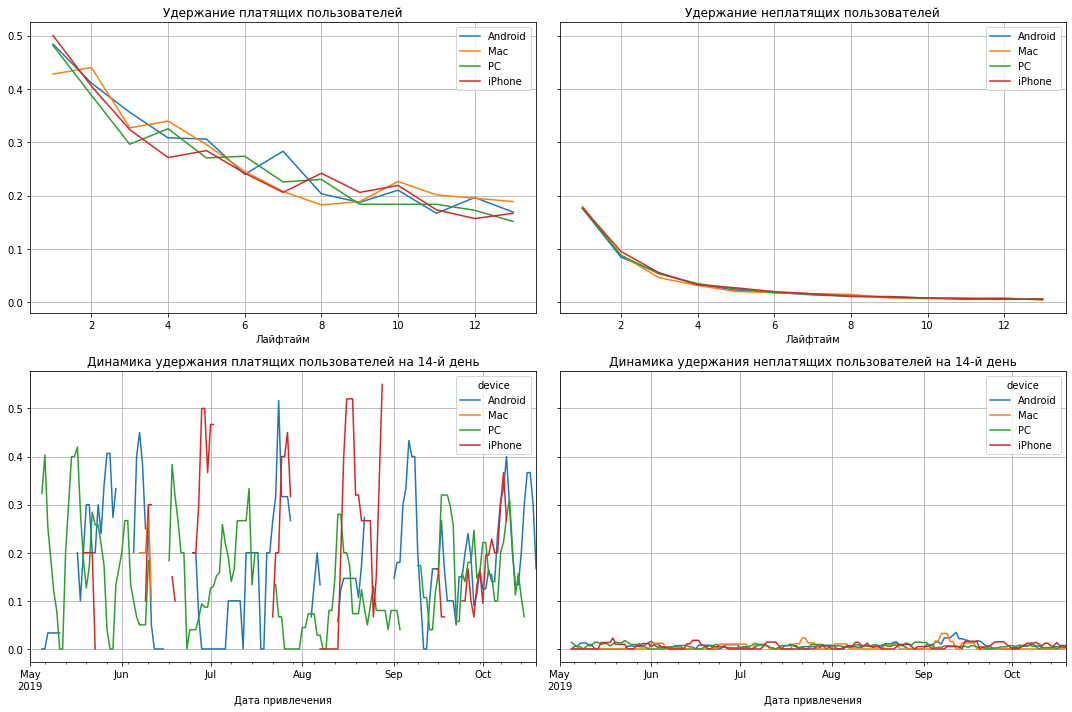

In [53]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region !="United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days,window=5) 

Исходя из графиков, можно рекомендовать в Европе использовать каналы lambdaMediaAds, WahooNetBanner, LeapBob, OppleCreativeMedia, на всех устройствах.

# Шаг 6. Общие выводы

* 6.1. Выделите причины неэффективности привлечения пользователей.
* 6.2. Сформулируйте рекомендации для отдела маркетинга.

Был проанализирован лог сервера развлекательного приложения Procrastinate Pro+ с данными о посещениях новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. 

Перед анализом выполнена предобработка данных, названия колонок приведены к единому регистру, данные соответствующих столбцов переведены в формат даты. Проверен тип данных в столбцах, наличие пропусков и дубликатов.

Построены пользовательские профили, подсчитаны метрики LTV, ROI общие, а также с разбивкой по регионам, устройствам и каналам привлечения. Подсчитана конверсия и удержание. В ходе анализа всех метрик выявлены причины неэффективного привлечения:

* Не окупилась реклама для пользователей устройств iPhone и Mac

* Не окупилась реклама в США, несмотря на трату большей части бюджета (~86%)

* Не окупилась реклама через каналы TipTop, FaceBoom, AdNonSense

* CAC для TipTop увеличивался каждый месяц

* Низкое удержание пользователей в США, а также пользователей, пришедших через каналы FaceBoom и AdNonSense

* Почти не использовались другие каналы привлечения с высокой конверсией в других регионах

Сформулированые следующие рекомендации:

* Распределять рекламный бюджет более рационально, используя разные стратегии для США и Европы

* в США перспективно использовать альтернативные каналы привлечения: YRabbit, MediaTornado, RocketSuperAds. Расмотреть также рекламу с большим упором на Android

* В Европе можно рекомендовать использовать каналы lambdaMediaAds, WahooNetBanner, LeapBob, OppleCreativeMedia, на всех устройствах.